# Analysis for MOT beam SPCM signal drift

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import h5py
import os
import csv
import datetime
from datetime import datetime as dt
from datetime import time
results = "C:\\Networking Experiment\\artiq codes\\artiq-master\\results\\"

In [4]:
# from https://stackoverflow.com/questions/37765197/darken-or-lighten-a-color-in-matplotlib
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

## 2023.10.03

In [5]:
f = h5py.File(os.path.join(results, '2023-10-03\\15\\000005997-MonitorSPCMinApplet.h5'))
[x for x in f['datasets'].values()]

[<HDF5 dataset "FORT_monitor": shape (1,), type "<f8">,
 <HDF5 dataset "MOT1_monitor": shape (1,), type "<f8">,
 <HDF5 dataset "MOT2_monitor": shape (1,), type "<f8">,
 <HDF5 dataset "MOT3_monitor": shape (1,), type "<f8">,
 <HDF5 dataset "MOT4_monitor": shape (1,), type "<f8">,
 <HDF5 dataset "MOT5_monitor": shape (1,), type "<f8">,
 <HDF5 dataset "MOT6_monitor": shape (1,), type "<f8">,
 <HDF5 dataset "MOT_switchyard_monitor": shape (1,), type "<f8">,
 <HDF5 dataset "SPCM_count_rate_Hz": shape (201,), type "<f8">,
 <HDF5 dataset "dt_exposure": shape (), type "<f8">,
 <HDF5 dataset "print_count_rate": shape (), type "|b1">,
 <HDF5 dataset "run_time_minutes": shape (), type "<f8">,
 <HDF5 dataset "sat1s": shape (), type "<f8">]

In [12]:
[x for x in f['archive'].values()]

[<HDF5 dataset "AOM_A1_freq": shape (), type "<f8">,
 <HDF5 dataset "AOM_A1_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A2_freq": shape (), type "<f8">,
 <HDF5 dataset "AOM_A2_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A3_freq": shape (), type "<f8">,
 <HDF5 dataset "AOM_A3_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A4_freq": shape (), type "<f8">,
 <HDF5 dataset "AOM_A4_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A5_freq": shape (), type "<f8">,
 <HDF5 dataset "AOM_A5_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A6_freq": shape (), type "<f8">,
 <HDF5 dataset "AOM_A6_power": shape (), type "<f8">,
 <HDF5 dataset "AX_volts_MOT": shape (), type "<f8">,
 <HDF5 dataset "AX_volts_PGC": shape (), type "<f8">,
 <HDF5 dataset "AX_volts_RO": shape (), type "<f8">,
 <HDF5 dataset "AY_volts_MOT": shape (), type "<f8">,
 <HDF5 dataset "AY_volts_PGC": shape (), type "<f8">,
 <HDF5 dataset "AY_volts_RO": shape (), type "<f8">,
 <HDF5 dataset "AZ_bottom_volts_MOT"

In [13]:
t_minutes = np.single(f['datasets']['run_time_minutes'])
MOTdata = [np.array(f['datasets'][f'MOT{i+1}_monitor']) for i in range(6)]
counts_Hz = np.array(f['datasets']['SPCM_count_rate_Hz'])

In [14]:
t_minutes

1.0

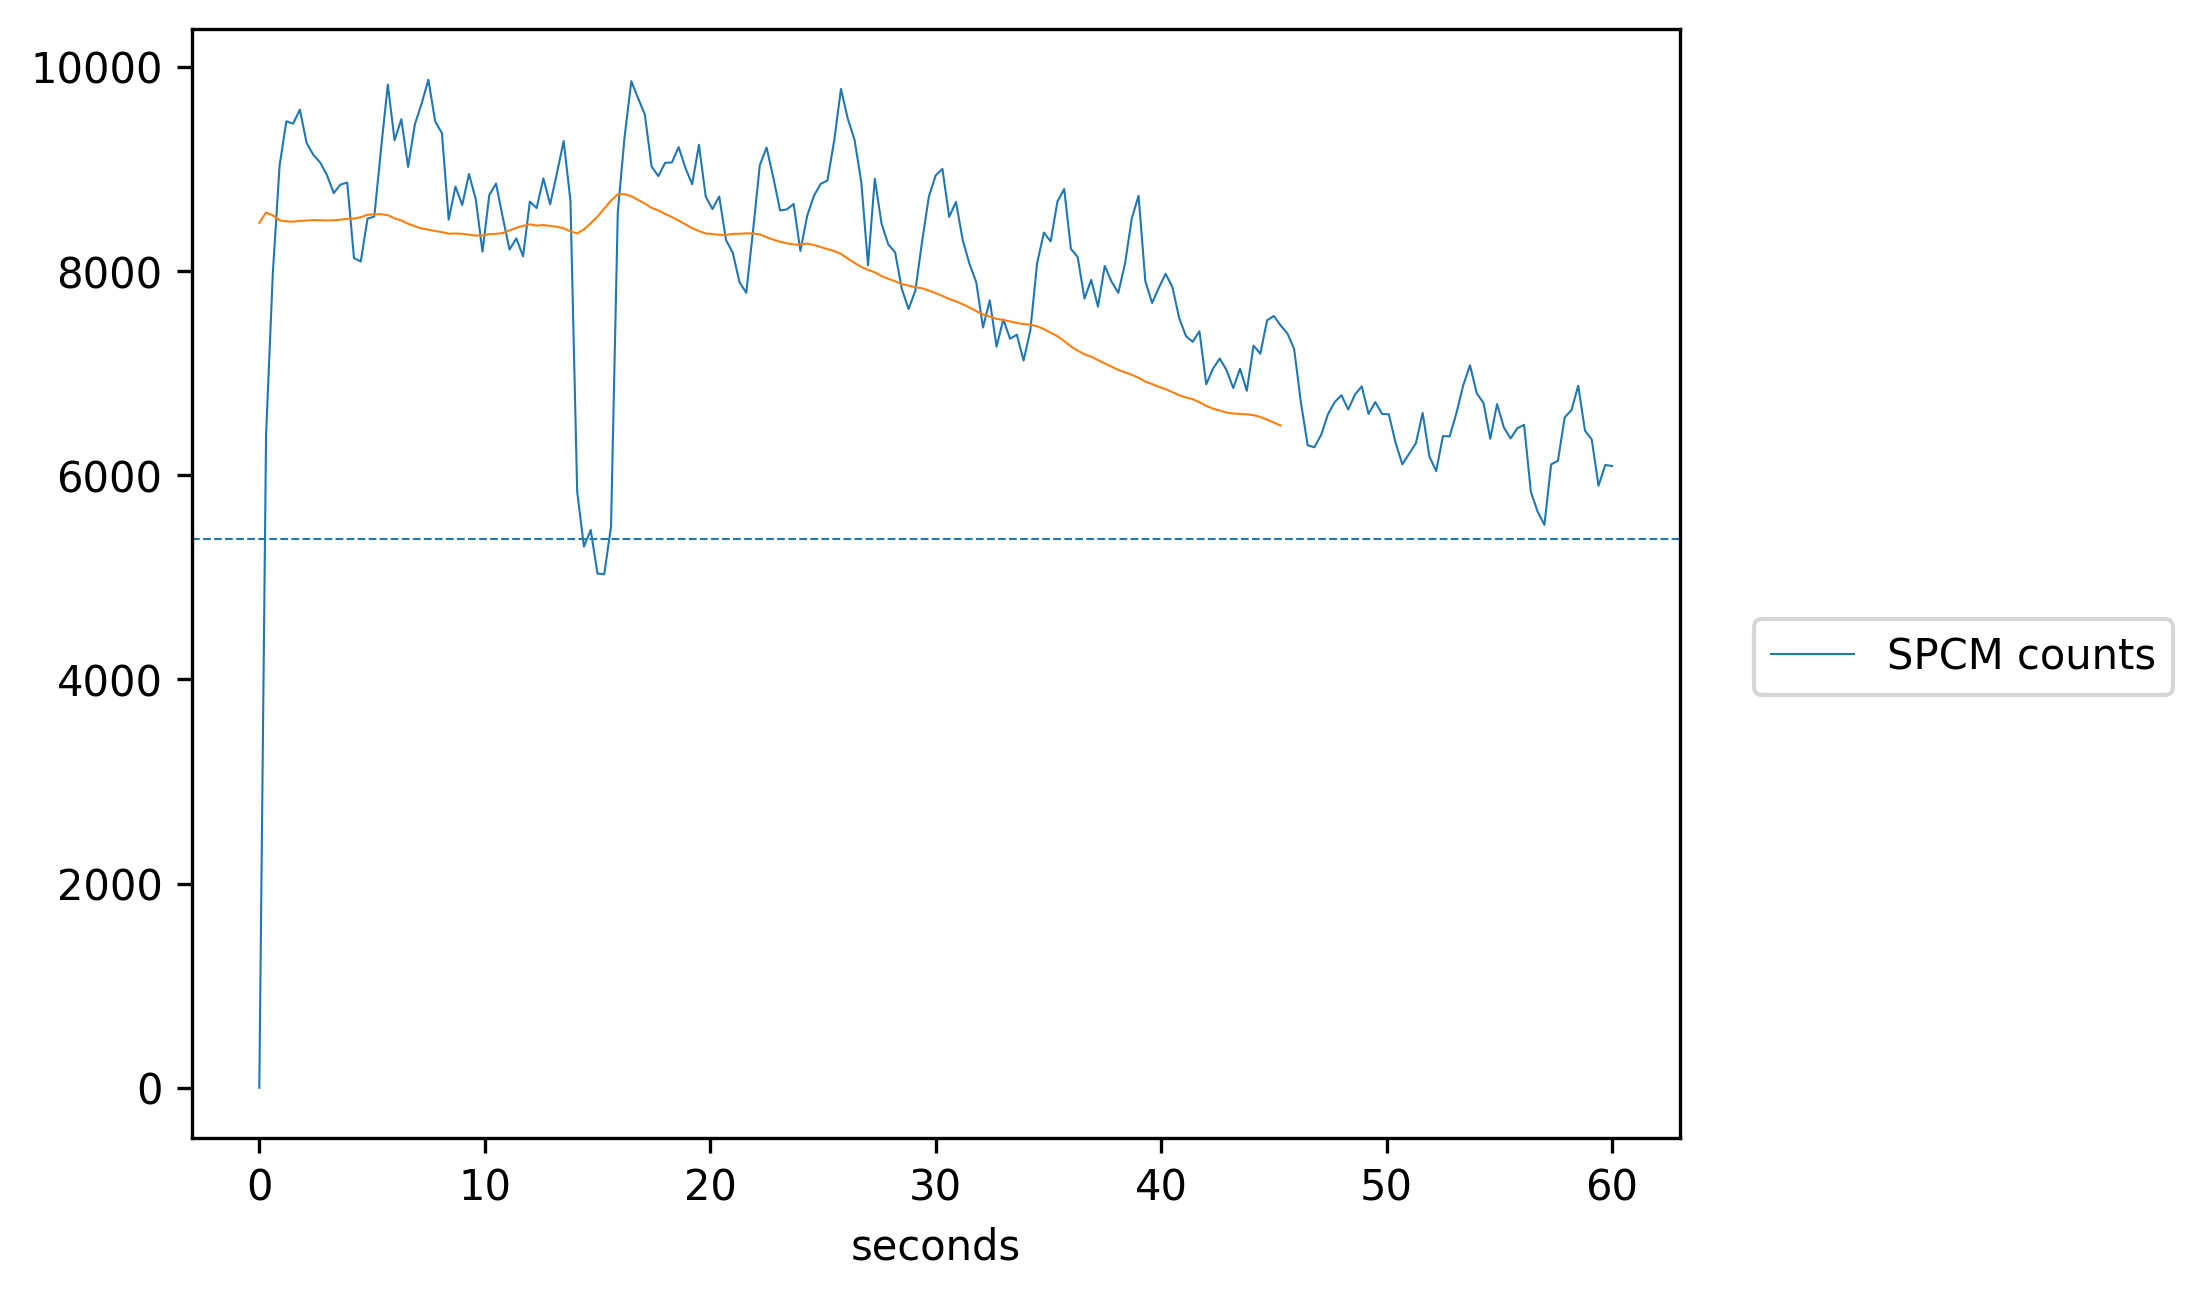

In [35]:
# the dip shown between about 30 and 500 is when I intentionally made the MOT go completely
# away by tuning the X shim, and then brought the MOT back to the same location "by hand".
# the duration of the experiment was about 10 minutes. every point showing the MOT power was
# plotted just after the feedback was run.

labels = [f'MOT{i+1}' for i in range(6)]+['switchyard_in']
fig,ax = plt.subplots(dpi=300)
# ax, ax2 = axes
# colors = ['darkred','darkviolet','darkorange','dodgerblue','teal','crimson','indigo']
# for label,data,color in zip(labels,MOTdata,colors):
#     ypts = data # the feedback runs 20 times before we start counting photons
#     xpts = range(len(ypts))
# #     ax.scatter(xpts, ypts, color=color,s=0.1)
#     ax.plot(xpts, ypts, color=color, label=label,linewidth=0.5)
#     # ax.set_ylim((0.95,1.05))
#     ax.legend(loc=(1.05,0.1))
# ax.get_xaxis().set_visible(False)
counts_steps = len(counts_Hz)

t_steps = np.linspace(0,t_minutes*60,counts_steps)
ax.plot(t_steps,counts_Hz,label='SPCM counts',linewidth=0.5)
rollmean = np.convolve(counts_Hz, np.ones(50)/50, mode='valid')
ax.plot(t_steps[:len(rollmean)],rollmean,linewidth=0.5)
ax.set_xlabel("seconds")
ax.axhline(8500*(1-1/np.e),linestyle='--',linewidth=0.5)
# plt.gcf().autofmt_xdate()
ax.legend(loc=(1.05,0.4))
# fig.tight_layout()

In [30]:
rollmean[50]

8532.733333333334

In [24]:
rollmean

array([7817.62852405])

In [ ]:
MOT

## 2023.09.08

In [ ]:
000005143-SamplerMOTCoilTune

## 2023.09.01

SPCM signal with feedback on, monitored by running SamplerMOTCoilTune. I zeroed the potentiometer box and ran the code on differential mode, with the coil values set to what gave 10 kHz counts in a previous run. Note however that I was only getting ~ 8 kHz counts in the most recent run

In [2]:
f = h5py.File(os.path.join(results, '2023-08-31\\17\\000004757-SamplerMOTCoilTune.h5'))
[x for x in f['datasets'].values()]

[<HDF5 dataset "AOM_A1_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A2_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A3_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A4_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A5_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A6_power": shape (), type "<f8">,
 <HDF5 dataset "MOT1_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT2_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT3_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT4_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT5_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT6_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "MOT_switchyard_monitor": shape (921,), type "<f8">,
 <HDF5 dataset "SPCM_count_rate_Hz": shape (180005,), type "<f8">,
 <HDF5 dataset "SPCM_max_counts_and_volts": shape (5,), type "<f8">,
 <HDF5 dataset "monitor_pts": shape (1,), type "<i4">,
 <HDF5 dataset "p_cooling_DP_MOT": shape (), type "<f8">]

In [141]:
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
counts_Hz = np.array(f['datasets']['SPCM_count_rate_Hz'])

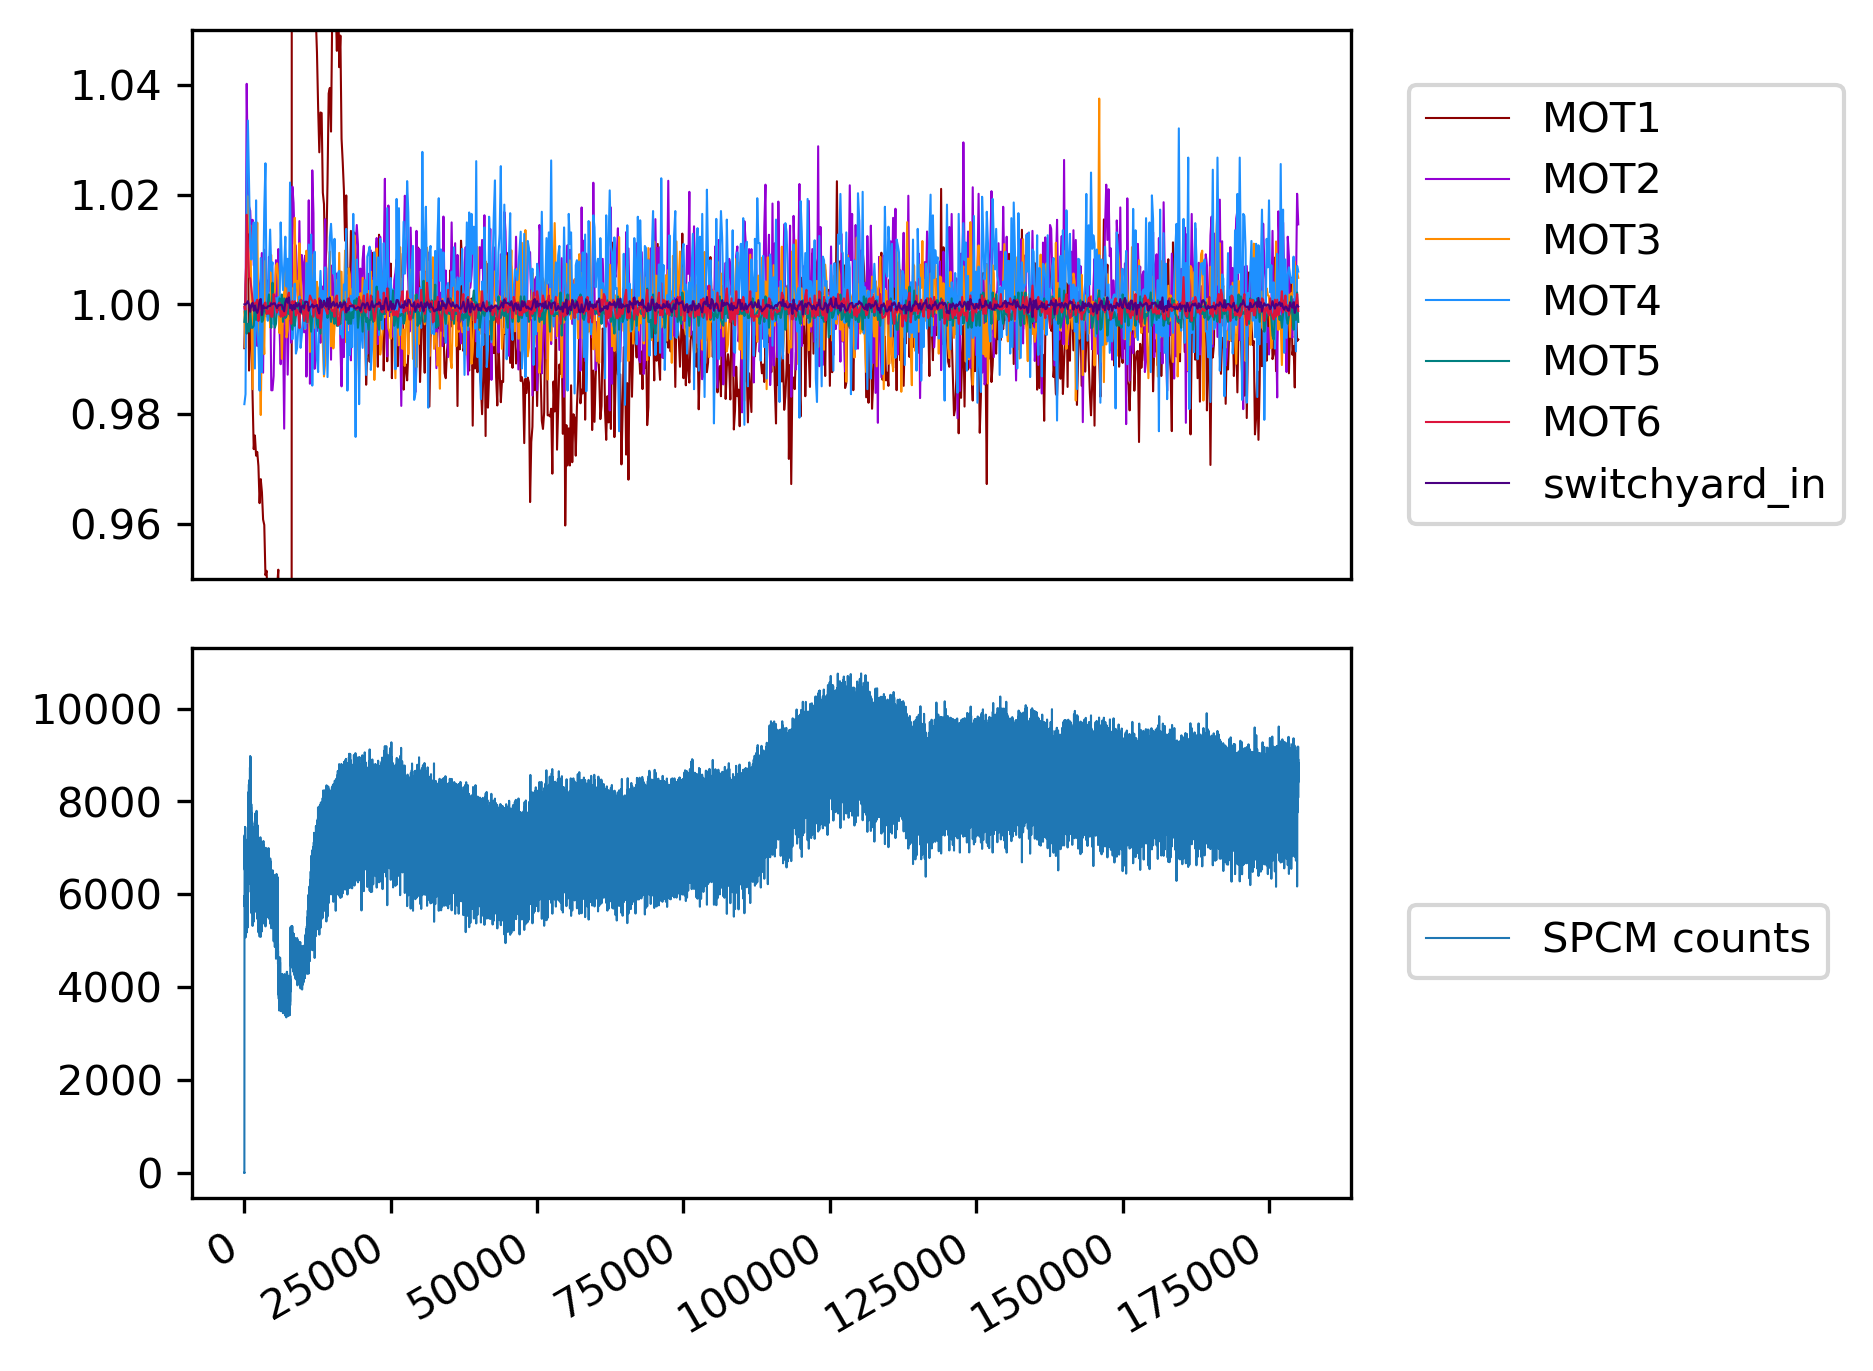

In [210]:
# the dip shown between about 30 and 500 is when I intentionally made the MOT go completely
# away by tuning the X shim, and then brought the MOT back to the same location "by hand".
# the duration of the experiment was about 10 minutes. every point showing the MOT power was
# plotted just after the feedback was run.

labels = [f'MOT{i+1}' for i in range(6)]+['switchyard_in']
fig,axes = plt.subplots(nrows=2,dpi=300)
ax, ax2 = axes
colors = ['darkred','darkviolet','darkorange','dodgerblue','teal','crimson','indigo']
for label,data,color in zip(labels,MOTdata,colors):
    ypts = data[20:] # the feedback runs 20 times before we start counting photons
    xpts = range(len(ypts))
#     ax.scatter(xpts, ypts, color=color,s=0.1)
    ax.plot(xpts, ypts, color=color, label=label,linewidth=0.5)
    ax.set_ylim((0.95,1.05))
    ax.legend(loc=(1.05,0.1))
ax.get_xaxis().set_visible(False)
counts_steps = len(counts_Hz)

hr0 = 17
min0 = 10
timestamps = [((hr0+(min0+i)//60)%24,(min0+i)%60) for i in range(900)]

ax2.plot(range(counts_steps),counts_Hz,label='SPCM counts',linewidth=0.5)
# ax2.set_xticks(timestamps)
plt.gcf().autofmt_xdate()
ax2.legend(loc=(1.05,0.4))
fig.tight_layout()

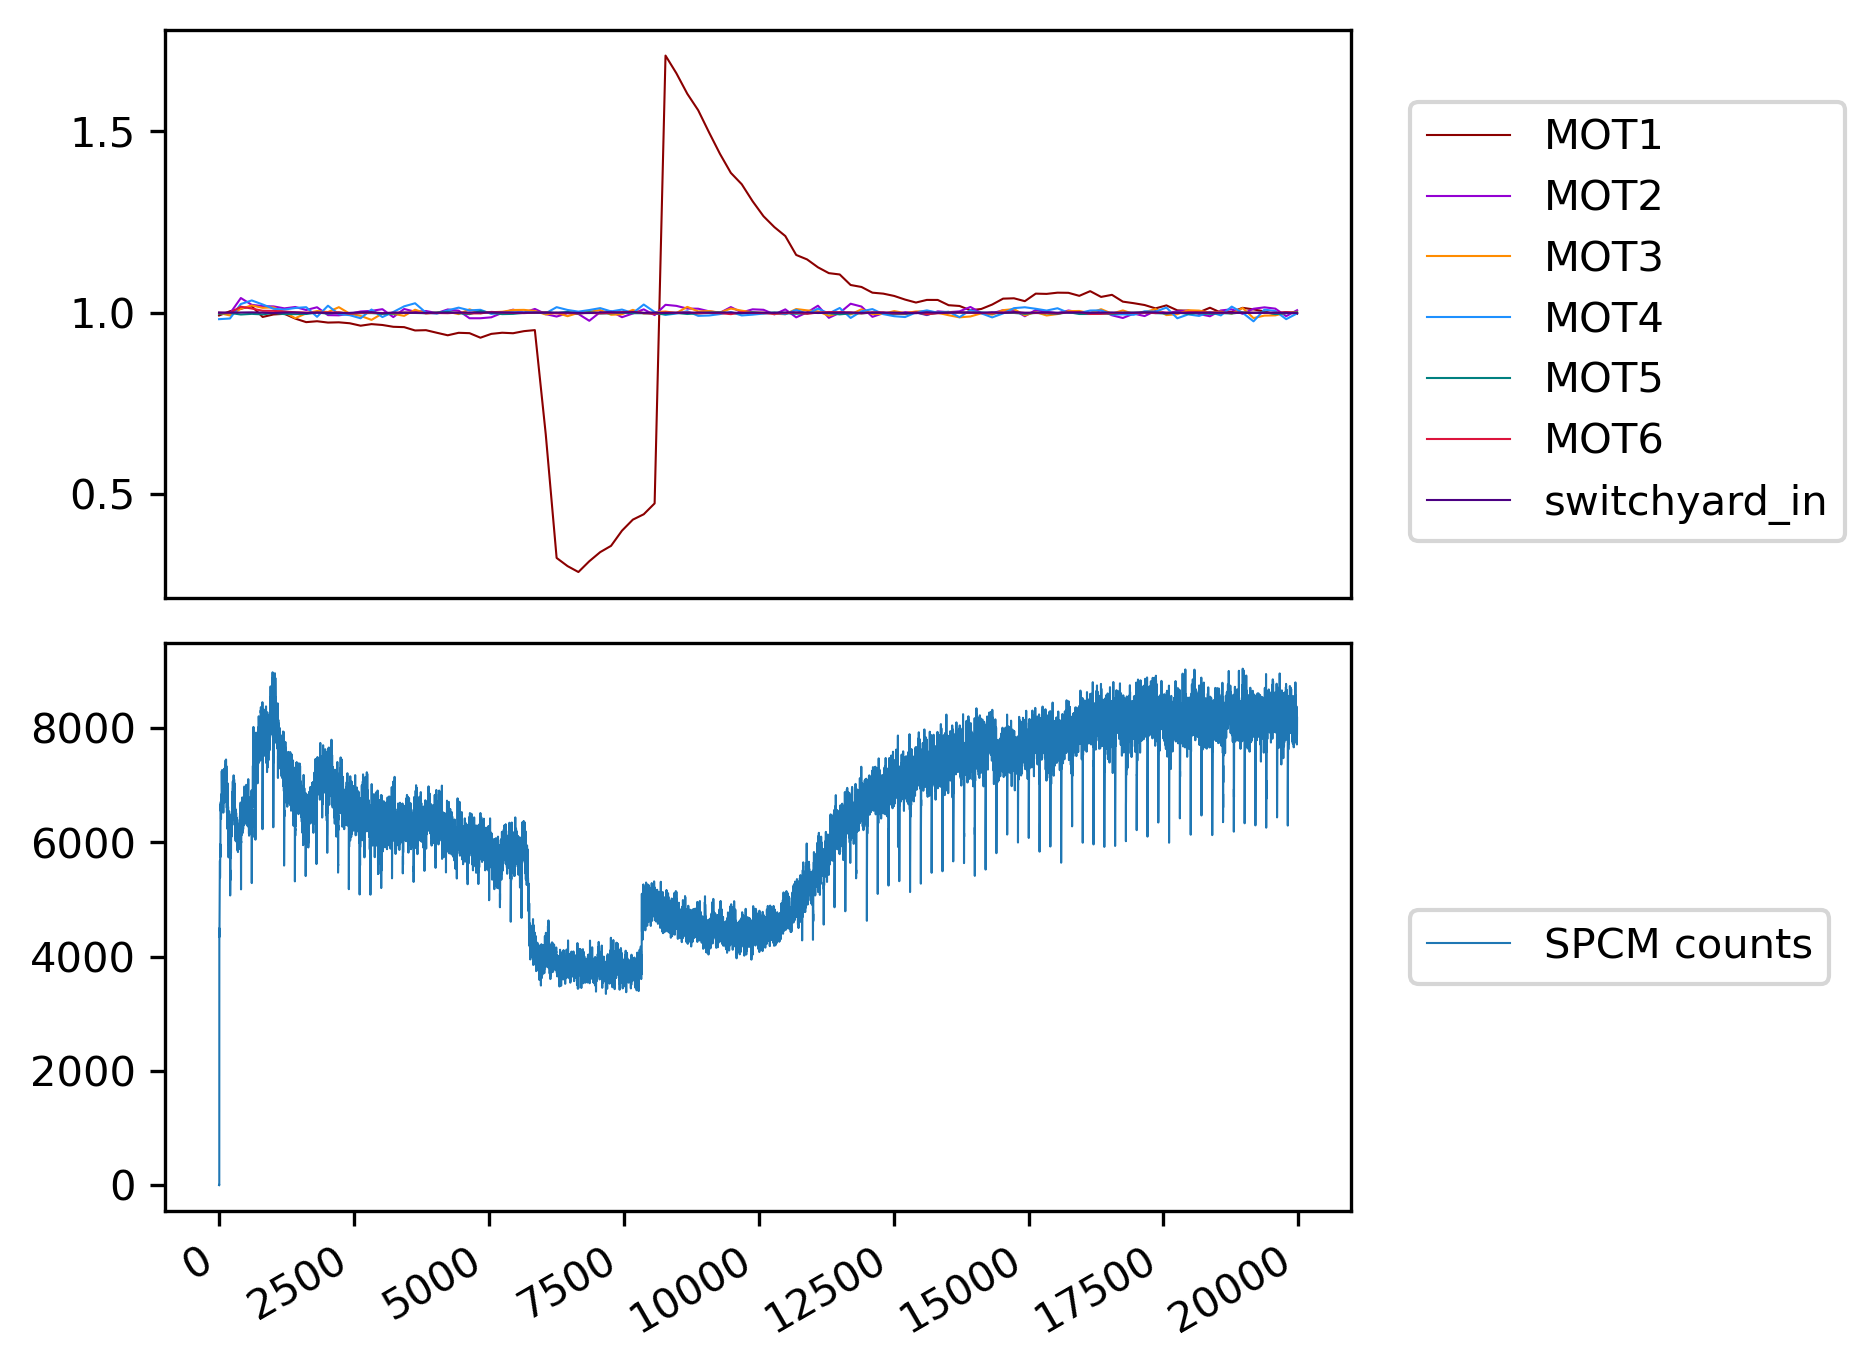

In [218]:
pts = 100
labels = [f'MOT{i+1}' for i in range(6)]+['switchyard_in']
fig,axes = plt.subplots(nrows=2,dpi=300)
ax, ax2 = axes
colors = ['darkred','darkviolet','darkorange','dodgerblue','teal','crimson','indigo']
for label,data,color in zip(labels,MOTdata,colors):
    ypts = data[20:pts+20] # the feedback runs 20 times before we start counting photons
    xpts = range(len(ypts))
#     ax.scatter(xpts, ypts, color=color,s=0.1)
    ax.plot(xpts, ypts, color=color, label=label,linewidth=0.5)
#     ax.set_ylim((0.95,1.05))
    ax.legend(loc=(1.05,0.1))
ax.get_xaxis().set_visible(False)
counts_steps = int(len(counts_Hz)*pts/len(data[20:])) #len(counts_Hz)

ax2.plot(range(counts_steps),counts_Hz[:counts_steps],label='SPCM counts',linewidth=0.5)
plt.gcf().autofmt_xdate()
ax2.legend(loc=(1.05,0.4))
fig.tight_layout()

In [223]:
n = 1500 #len(counts_Hz)
(0.314*n+(n//200)*0.1)/60

7.861666666666666

## 2023.08.31

SPCM signal with feedback on, monitored by running SamplerMOTCoilTune. I zeroed the potentiometer box and ran the code on differential mode, with the coil values set to what gave 10 kHz counts in a previous run.

In [110]:
f = h5py.File(os.path.join(results, '2023-08-31\\15\\000004752-SamplerMOTCoilTune.h5'))
[x for x in f['datasets'].values()]

[<HDF5 dataset "AOM_A1_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A2_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A3_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A4_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A5_power": shape (), type "<f8">,
 <HDF5 dataset "AOM_A6_power": shape (), type "<f8">,
 <HDF5 dataset "MOT1_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT2_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT3_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT4_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT5_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT6_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "MOT_switchyard_monitor": shape (31,), type "<f8">,
 <HDF5 dataset "SPCM_count_rate_Hz": shape (2005,), type "<f8">,
 <HDF5 dataset "SPCM_max_counts_and_volts": shape (5,), type "<f8">,
 <HDF5 dataset "monitor_pts": shape (1,), type "<i4">,
 <HDF5 dataset "p_cooling_DP_MOT": shape (), type "<f8">]

In [111]:
MOTdata = [np.array(data) for data in  f['datasets'].values()][6:13]
counts_Hz = np.array(f['datasets']['SPCM_count_rate_Hz'])

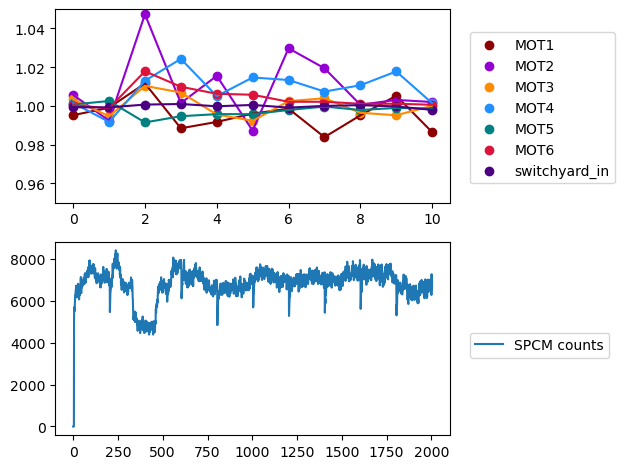

In [138]:
# the dip shown between about 30 and 500 is when I intentionally made the MOT go completely
# away by tuning the X shim, and then brought the MOT back to the same location "by hand".
# the duration of the experiment was about 10 minutes. every point showing the MOT power was
# plotted just after the feedback was run.

labels = [f'MOT{i+1}' for i in range(6)]+['switchyard_in']
fig,axes = plt.subplots(nrows=2)
ax, ax2 = axes
colors = ['darkred','darkviolet','darkorange','dodgerblue','teal','crimson','indigo']
for label,data,color in zip(labels,MOTdata,colors):
    ypts = data[20:] # the feedback runs 20 times before we start counting photons
    xpts = range(len(ypts))
    ax.scatter(xpts, ypts, label=label, color=color)
    ax.plot(xpts, ypts, color=color)
    ax.set_ylim((0.95,1.05))
    ax.legend(loc=(1.05,0.1))
ax2.plot(range(len(counts_Hz)),counts_Hz,label='SPCM counts')
ax2.legend(loc=(1.05,0.4))
fig.tight_layout()